<a href="https://colab.research.google.com/github/AatkaMeraj/NinjaCart-CV-Image-Classification/blob/main/NinjaCart_CV_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

**Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.**

**The objective is to develop a program that can recognize the vegetable item(s) in a photo and identify them for the user.**

# LOADING THE DATA

In [ ]:
train_data= '/content/drive/MyDrive/ninjacart_data/ninjacart_data/train'
test_data= '/content/drive/MyDrive/ninjacart_data/ninjacart_data/test'

In [ ]:
#! pip install tensorflow

# SPLITTING DATA INTO TRAIN, VAL AND TEST

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# split into train and validation
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# test data generator
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


# DISPLAYING SOME IMAGES WITH LABELS

In [ ]:
# Get a batch of images and labels

images, labels = next(train_generator)

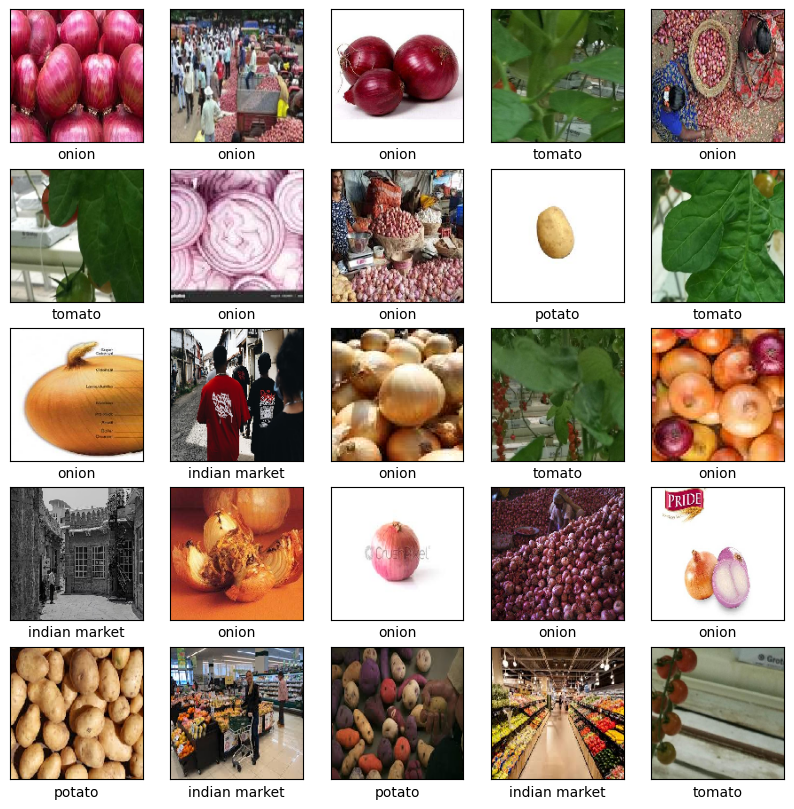

In [ ]:
import matplotlib.pyplot as plt

class_labels = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])

    plt.xlabel(class_labels[labels[i].argmax()])
plt.show()


# HISTOGRAM OF CATEGORIES

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Count the number of images per class for each generator
def get_image_counts(generator):

    class_counts = {class_name: 0 for class_name in generator.class_indices.keys()}
    for class_name in generator.classes:
        class_counts[list(generator.class_indices.keys())[class_name]] += 1
    return class_counts

# Get image counts for training, validation, and test sets
train_class_counts = get_image_counts(train_generator)
val_class_counts = get_image_counts(val_generator)
test_class_counts = get_image_counts(test_generator)

# plot the histograms
def plot_histogram(class_counts, dataset_type):
    plt.figure(figsize=(8, 4))
    plt.bar(class_counts.keys(), class_counts.values(), color=np.random.rand(3,))
    plt.title(f'Image Counts in Each Class ({dataset_type} Dataset)')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()



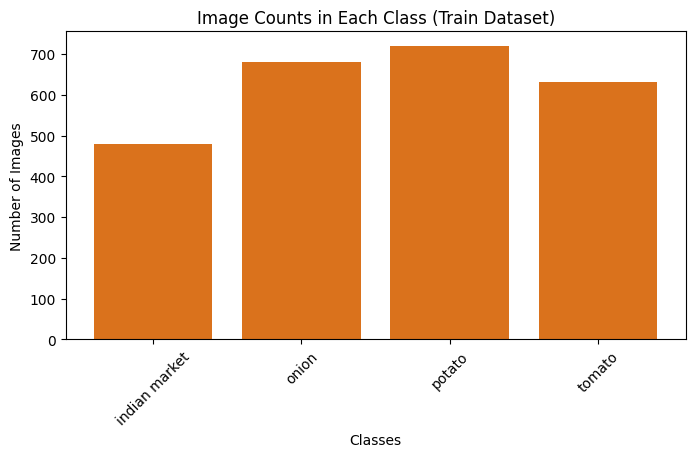

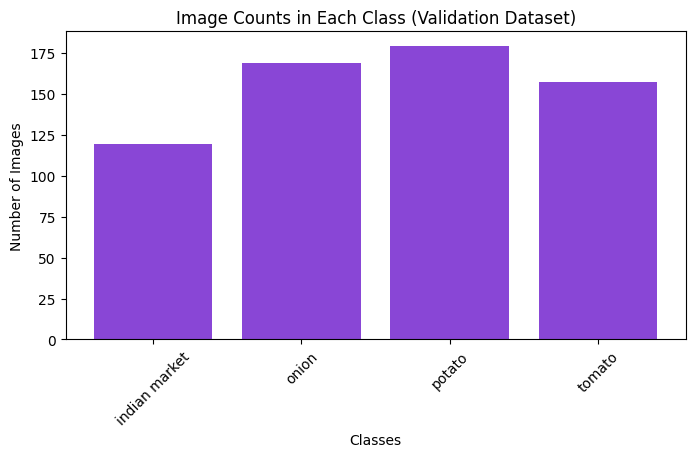

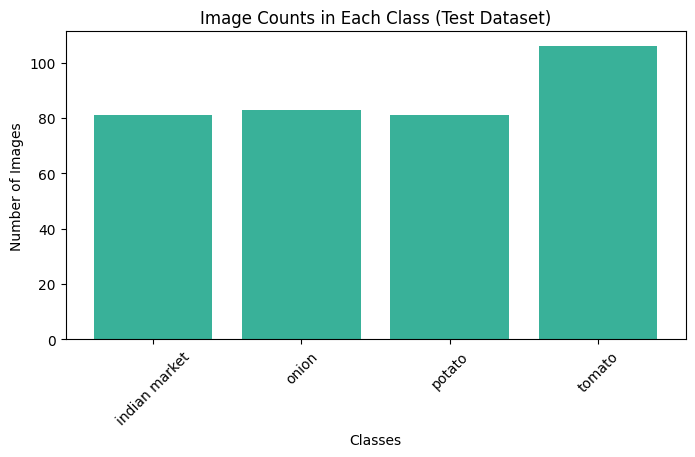

In [ ]:
# Plot histograms for train, validation, and test sets

plot_histogram(train_class_counts, 'Train')
plot_histogram(val_class_counts, 'Validation')
plot_histogram(test_class_counts, 'Test')

**Potato has more images than other categories in Train and Validation data.**

**In the test data, number of Tomato images is maximum.**

# DATA IMBALANCE CHECK

In [ ]:
import numpy as np

# count images in each category
def count_images_per_category(generator):
    class_counts = {class_name: 0 for class_name in generator.class_indices.keys()}

    # Count the occurrences of each class
    for class_index in generator.classes:
        class_name = list(generator.class_indices.keys())[class_index]
        class_counts[class_name] += 1

    return class_counts

# Count images for training and validation sets
train_class_counts = count_images_per_category(train_generator)
val_class_counts = count_images_per_category(val_generator)
test_class_counts = count_images_per_category(test_generator)

print("Training set image counts:", train_class_counts)
print("Validation set image counts:", val_class_counts)
print("Test set image counts:", test_class_counts)


Training set image counts: {'indian market': 480, 'onion': 680, 'potato': 719, 'tomato': 632}
Validation set image counts: {'indian market': 119, 'onion': 169, 'potato': 179, 'tomato': 157}
Test set image counts: {'indian market': 81, 'onion': 83, 'potato': 81, 'tomato': 106}


**The data has a bit of class imbalance. The ratios between the smallest and largest class across the training, validation, and test sets are 0.67 and 0.76.**

# BASIC CNN MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
IMG_HEIGHT = 150
IMG_WIDTH = 150
NUM_CLASSES = 4

# Define the CNN model architecture
def create_cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected (Dense) layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer with softmax activation for 4 classes
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model




In [ ]:
# Create the CNN model
model = create_cnn_model()

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs= 32
)



Epoch 1/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 1197s 15s/step - accuracy: 0.7010 - loss: 0.7233 - val_accuracy: 0.7204 - val_loss: 0.6345
Epoch 2/32
 1/78 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7188 - loss: 0.6026

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 61s 794ms/step - accuracy: 0.7188 - loss: 0.6026 - val_accuracy: 0.9375 - val_loss: 0.4663
Epoch 3/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 47s 272ms/step - accuracy: 0.8025 - loss: 0.5160 - val_accuracy: 0.7747 - val_loss: 0.5349
Epoch 4/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.4709 - val_accuracy: 0.6875 - val_loss: 0.8097
Epoch 5/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.8341 - loss: 0.4562 - val_accuracy: 0.7928 - val_loss: 0.5030
Epoch 6/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7500 - loss: 0.5375 - val_accuracy: 0.8125 - val_loss: 0.5572
Epoch 7/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - accuracy: 0.8432 - loss: 0.3983 - val_accuracy: 0.7730 - val_loss: 0.5330
Epoch 8/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8438 - loss: 0.4419 - val_accuracy: 0.7500 - val_loss: 0.4866
Epoch 9/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - accuracy: 0.8380 - loss: 0.4116 - val_accuracy: 0.8158 - val

**The training accuracy of 100% is perfect, while the validation accuracy of 87% is notably lower, suggests that the model is likely overfitting to the training data.
The model has memorized the training data but is not generalizing well to new data.**

**So we will be requiring some hyperparameter tuning and regularization techniques to reduce the overfitting.**

# HYPERPARAMETER TUNING OF THE BASELINE MODEL

In [ ]:
 !pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
# searching for the best hyperparameters

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_HEIGHT = 150
IMG_WIDTH = 150
NUM_CLASSES = 4

# Define the HyperModel
def build_model(hp):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel_size', values=[3, 5]),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-5, max_value=1e-3, sampling='LOG')),  # L2 Regularization
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=16),
        kernel_size=hp.Choice('conv_2_kernel_size', values=[3, 5]),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-5, max_value=1e-3, sampling='LOG'))  # L2 Regularization
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(
        filters=hp.Int('conv_3_filters', min_value=128, max_value=512, step=32),
        kernel_size=hp.Choice('conv_3_kernel_size', values=[3, 5]),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-5, max_value=1e-3, sampling='LOG'))  # L2 Regularization
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected (Dense) layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=512, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-5, max_value=1e-3, sampling='LOG'))  # L2 Regularization
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer with softmax activation for NUM_CLASSES
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



In [ ]:
# Set up Keras Tuner for hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='cnn_hyperparam_tuning'
)


# Perform hyperparameter search
tuner.search(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters for the first conv layer is {best_hps.get('conv_1_filters')} and the kernel size is {best_hps.get('conv_1_kernel_size')}.
The optimal number of filters for the second conv layer is {best_hps.get('conv_2_filters')} and the kernel size is {best_hps.get('conv_2_kernel_size')}.
The optimal number of filters for the third conv layer is {best_hps.get('conv_3_filters')} and the kernel size is {best_hps.get('conv_3_kernel_size')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
The optimal L2 regularization factor is {best_hps.get('l2_reg')}.
""")

Trial 3 Complete [01h 11m 37s]
val_accuracy: 0.7976973652839661

Best val_accuracy So Far: 0.7976973652839661
Total elapsed time: 03h 06m 45s

The optimal number of filters for the first conv layer is 80 and the kernel size is 3.
The optimal number of filters for the second conv layer is 128 and the kernel size is 5.
The optimal number of filters for the third conv layer is 416 and the kernel size is 3.
The optimal number of units in the dense layer is 256.
The optimal dropout rate is 0.30000000000000004.
The optimal learning rate is 0.0007325850100893532.
The optimal L2 regularization factor is 0.00036265062575473466.



In [ ]:
# model with the best hyper parameters

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

IMG_HEIGHT = 150
IMG_WIDTH = 150
NUM_CLASSES = 4

# CNN model with the best hyperparameters
def create_cnn_model():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(
        filters=80,
        kernel_size=(3, 3),
        activation='relu',
        kernel_regularizer=l2(0.0003),
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(
        filters=128,
        kernel_size=(5, 5),
        activation='relu',
        kernel_regularizer=l2(0.0003)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(
        filters=416,
        kernel_size=(3, 3),
        activation='relu',
        kernel_regularizer=l2(0.0003)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(
        units=256,
        activation='relu',
        kernel_regularizer=l2(0.0003)
    ))

    # Add Dropout for regularization
    model.add(Dropout(0.3))

    # Output layer with softmax
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Compilation
    model.compile(
        optimizer=Adam(learning_rate=0.00073),  # Optimal learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# model instantiation
model = create_cnn_model()

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 80)        │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 70, 70, 128)         │         256,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 33, 33, 416)         │         479,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 416)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 106496)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      27,263,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,002,276 (106.82 MB)

 Trainable params: 28,002,276 (106.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fitting the model

history = model.fit(
    train_generator,
    epochs=32,
    validation_data=val_generator
)


Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 1374s 16s/step - accuracy: 0.5351 - loss: 1.4775 - val_accuracy: 0.7484 - val_loss: 0.7461
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 774s 10s/step - accuracy: 0.8120 - loss: 0.6571 - val_accuracy: 0.7949 - val_loss: 0.6613
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 806s 10s/step - accuracy: 0.8357 - loss: 0.5564 - val_accuracy: 0.7660 - val_loss: 0.6753
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 773s 9s/step - accuracy: 0.8414 - loss: 0.5405 - val_accuracy: 0.8077 - val_loss: 0.6266
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 720s 9s/step - accuracy: 0.8537 - loss: 0.4741 - val_accuracy: 0.7997 - val_loss: 0.5992
Epoch 6/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 719s 9s/step - accuracy: 0.8646 - loss: 0.4494 - val_accuracy: 0.8301 - val_loss: 0.5447
Epoch 7/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 739s 9s/step - accuracy: 0.8849 - loss: 0.3910 - val_accuracy: 0.7676 - val_loss: 0.7420
Epoch 8/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 750s 9s/step - accuracy: 0.8778 - loss: 0.4334 - val_accuracy: 0.7837 - val_loss

**The training accuracy of 97% is pretty good as compared to the validation accuracy of 84%, indicating that the model is still overfitting.**

**So to generalize the model better to the new data, we will some augmentation techniques and early stopping.**

# BASELINE CNN MODEL WITH AUGMENTATION AND EARLY STOPPING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Image dimensions
IMG_HEIGHT = 150
IMG_WIDTH = 150
NUM_CLASSES = 4

# Define the CNN model
def create_cnn_model():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(
        filters=80,
        kernel_size=(3, 3),
        activation='relu',
        kernel_regularizer=l2(0.0003),
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(
        filters=128,
        kernel_size=(5, 5),
        activation='relu',
        kernel_regularizer=l2(0.0003)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(
        filters=416,
        kernel_size=(3, 3),
        activation='relu',
        kernel_regularizer=l2(0.0003)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(
        units=256,
        activation='relu',
        kernel_regularizer=l2(0.0003)
    ))

    # Dropout for regularization
    model.add(Dropout(0.3))

    # Output layer with softmax
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Compilation
    model.compile(
        optimizer=Adam(learning_rate=0.00073),  # Optimal learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiation
model = create_cnn_model()

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)



In [ ]:
# Train the model with Early Stopping and Data Augmentation

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=32,
    callbacks=[early_stopping]
)


Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 1009s 12s/step - accuracy: 0.4820 - loss: 1.5683 - val_accuracy: 0.7122 - val_loss: 0.8243
Epoch 2/32
 1/78 ━━━━━━━━━━━━━━━━━━━━ 13:52 11s/step - accuracy: 0.6562 - loss: 1.2064

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.6562 - loss: 1.2064 - val_accuracy: 0.8125 - val_loss: 0.6966
Epoch 3/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 833s 10s/step - accuracy: 0.8247 - loss: 0.6153 - val_accuracy: 0.7615 - val_loss: 0.6962
Epoch 4/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7188 - loss: 0.7827 - val_accuracy: 0.7500 - val_loss: 0.7469
Epoch 5/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 843s 10s/step - accuracy: 0.8525 - loss: 0.5224 - val_accuracy: 0.7862 - val_loss: 0.6260
Epoch 6/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8125 - loss: 0.4977 - val_accuracy: 0.7500 - val_loss: 0.6863
Epoch 7/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 803s 10s/step - accuracy: 0.8482 - loss: 0.5232 - val_accuracy: 0.7632 - val_loss: 0.6572
Epoch 8/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8438 - loss: 0.5203 - val_accuracy: 0.6250 - val_loss: 1.0166
Epoch 9/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 848s 10s/step - accuracy: 0.8416 - loss: 0.4943 - val_accuracy: 0.8125 - val_

**Due to early stopping, the best weights of the model is restored from epoch 14**

**The accuracy of the model on training data is 84% and the validation accuracy is 100%, which means that the model is underfitting.**

**Now we will try some Transfer learning techniques to improve the model's performace.**


# CNN MODEL USING TRANSFER LEARNING(VGG16)

In [ ]:
# preparing data for the model for transfer learning

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# split into train and validation
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# test data generator
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)


Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 4

 # Load the pre-trained VGG16 model without the top classification layers
vgg_base = VGG16(include_top=False,
                 weights='imagenet',
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
vgg_base.trainable = False

# Create a new model with custom top layers
def create_transfer_model():
    model = Sequential()

    model.add(vgg_base)

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.3))

    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.00073),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the model
model = create_transfer_model()

# Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
# Train the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=32,
    callbacks=[early_stopping]
)


Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 2120s 26s/step - accuracy: 0.6250 - loss: 1.7882 - val_accuracy: 0.8684 - val_loss: 0.3250
Epoch 2/32
 1/78 ━━━━━━━━━━━━━━━━━━━━ 25:18 20s/step - accuracy: 0.8750 - loss: 0.3380

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 31s 144ms/step - accuracy: 0.8750 - loss: 0.3380 - val_accuracy: 0.8750 - val_loss: 0.3610
Epoch 3/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 2012s 25s/step - accuracy: 0.9285 - loss: 0.2027 - val_accuracy: 0.8684 - val_loss: 0.3215
Epoch 4/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.8000 - loss: 0.2411 - val_accuracy: 0.8750 - val_loss: 0.4033
Epoch 5/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 1969s 25s/step - accuracy: 0.9634 - loss: 0.1209 - val_accuracy: 0.9079 - val_loss: 0.2328
Epoch 6/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.9688 - loss: 0.1173 - val_accuracy: 1.0000 - val_loss: 0.0242
Epoch 7/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 1966s 25s/step - accuracy: 0.9765 - loss: 0.0751 - val_accuracy: 0.9062 - val_loss: 0.2684
Epoch 8/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 31s 143ms/step - accuracy: 1.0000 - loss: 0.0399 - val_accuracy: 0.8750 - val_loss: 0.3145
Epoch 9/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 1969s 25s/step - accuracy: 0.9898 - loss: 0.0384 - val_accuracy: 0.903

**The accuracy from the best Epoch 6 is restored. The training accuracy is aroung 96% and the validation accuuracy is 100%, which a bit underfitted as the size of the validation data is very less.**

In [ ]:
# Evaluate the model on final test data

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 226s 21s/step - accuracy: 0.8117 - loss: 0.4844
Test accuracy: 0.8462


**The performance of the model on the test set is much acceptable, but the model still seems to be a bit underfitted.**

**So we will try some techniques like fine-tuning the last layers of the VGG16 model and increasing the model complexity, so that it can reduce underfitting.**

**Also, we will try to induce some class weights so that the model can perform better.**

In [ ]:
# assigning weights to the class

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Define the class labels
class_labels = ['indian market', 'onion', 'potato', 'tomato']

# Training set image counts
train_counts = {'indian market': 480, 'onion': 680, 'potato': 719, 'tomato': 632}

class_indices = np.arange(len(class_labels))

total_train_images = sum(train_counts.values())

# Class weights calculation
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=class_indices,
    y=np.concatenate([[i] * train_counts[class_labels[i]] for i in class_indices])
)

# Convert to dictionary for use in model.fit
class_weight_dict = dict(zip(class_indices, class_weights))

print(f"Class weights: {class_weight_dict}")


Class weights: {0: 1.3078125, 1: 0.9231617647058824, 2: 0.8730876216968011, 3: 0.9932753164556962}


In [ ]:
# model training with balanced class weights

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 4

# pre trained vgg16 model
vgg_base = VGG16(include_top=False,
                 weights='imagenet',
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# unfreezing some layers for tuning
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# new model with custom layers
def create_transfer_model():
    model = Sequential()

    model.add(vgg_base)
    model.add(Flatten())

    #dense layer
    model.add(Dense(512, activation='relu'))

    # add dropout
    model.add(Dropout(0.2))

    # Output layer with softmax
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0002),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiation
model = create_transfer_model()

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



# Define Early Stopping callback with longer patience
callbacks = [
    # EarlyStopping: Stop if validation loss doesn't improve for 8 epochs
    EarlyStopping(monitor='val_loss', patience=8, verbose=1, restore_best_weights=True),

    # ModelCheckpoint: Save the best model based on validation accuracy
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1),

    # ReduceLROnPlateau: Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.TensorBoard(log_dir="./logs")

]


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Model training code
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=25,
    class_weight=class_weight_dict,
    callbacks=callbacks
)


Epoch 1/25
78/78 [==============================] - ETA: 0s - loss: 0.5777 - accuracy: 0.7681
Epoch 1: val_accuracy improved from -inf to 0.91447, saving model to best_model.keras
78/78 [==============================] - 870s 11s/step - loss: 0.5777 - accuracy: 0.7681 - val_loss: 0.2206 - val_accuracy: 0.9145 - lr: 2.0000e-04
Epoch 2/25
78/78 [==============================] - ETA: 0s - loss: 0.1733 - accuracy: 0.9290
Epoch 2: val_accuracy did not improve from 0.91447
78/78 [==============================] - 82s 1s/step - loss: 0.1733 - accuracy: 0.9290 - val_loss: 0.2999 - val_accuracy: 0.8816 - lr: 2.0000e-04
Epoch 3/25
78/78 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.9605
Epoch 3: val_accuracy did not improve from 0.91447
78/78 [==============================] - 82s 1s/step - loss: 0.1085 - accuracy: 0.9605 - val_loss: 0.3175 - val_accuracy: 0.8816 - lr: 2.0000e-04
Epoch 4/25
78/78 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9

**The model has given the validation accuracy as 94%, and has stopped training due to to Early Stopping.**

In [ ]:
# Evaluate the model on final test data

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')

11/11 [==============================] - 7s 635ms/step - loss: 0.5703 - accuracy: 0.8832
Test accuracy: 0.8832


**The model is performing pretty well on the test data with an accuracy of 88%.**

# ACCURACY AND LOSS PLOTS

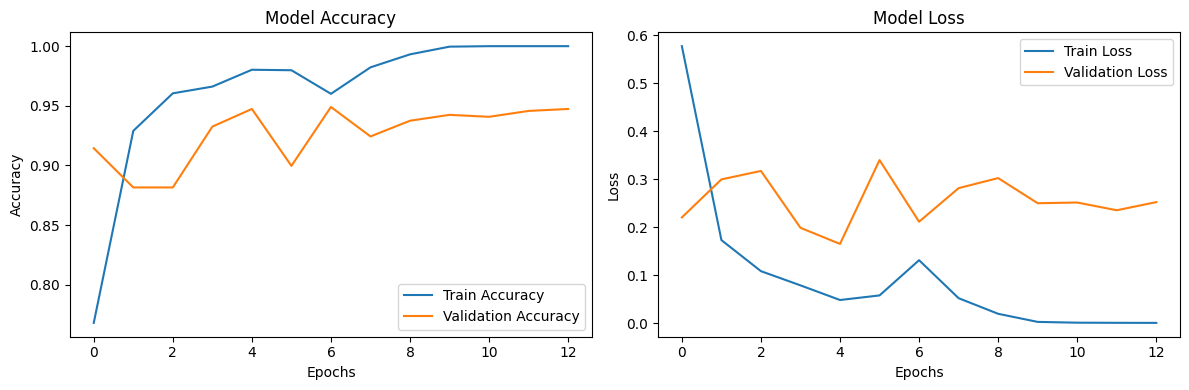

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
def plot_training_metrics(history):
    # Accuracy
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

#plotting the accuracy and loss of the model
plot_training_metrics(history)


**The accuracy of the model is fluctuating in the beginning, but after around 8th epochs it stabilizes and does not increases much.**

**Also the loss is not decreasing much after the 8th or 9th Epoch.**

# CONFUSION MATRIX

Found 351 images belonging to 4 classes.
11/11 [==============================] - 7s 624ms/step


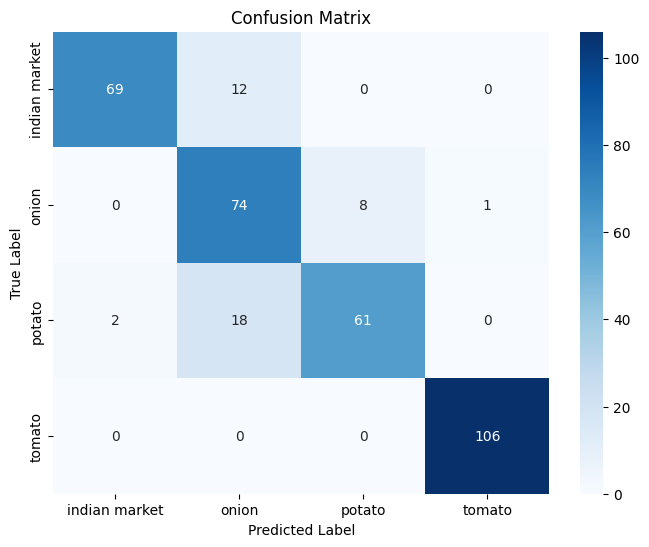

               precision    recall  f1-score   support

indian market       0.97      0.85      0.91        81
        onion       0.71      0.89      0.79        83
       potato       0.88      0.75      0.81        81
       tomato       0.99      1.00      1.00       106

     accuracy                           0.88       351
    macro avg       0.89      0.87      0.88       351
 weighted avg       0.90      0.88      0.88       351



In [ ]:
# confusion matrix of the model

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generate predictions for the test set
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Predict the classes
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (assuming the same order as in the test generator)
class_names = list(test_generator.class_indices.keys())

plot_confusion_matrix(cm, class_names)

# Print classification report for more detailed metrics
print(classification_report(y_true, y_pred, target_names=class_names))


**The model has performed quite well with 88% accuracy, which means that 88% of the total predictions are correct.**

**Also other metrics like Precision is 0.90, Recall is 0.88 and F1-Score is 0.88, as the weighted average takes into account the support (number of samples) for each class. Since 'tomato' has the highest support, its near-perfect performance heavily influences the weighted average, leading to a higher overall score.**

**The Precision for onion(0.71), Recall for potato(0.75) and F1-score for onion(0.81) is quite low as compared to the others.**

****

# INSIGHTS AND RECOMMENDATIONS

**INSIGHTS**

**The dataset has 4 classes, Potato, Tomato, Onion and Indian Market.**

**The data has a bit of class imbalance. The ratios between the smallest and largest class across the training, validation, and test sets are 0.67 and 0.76.**

**Using the base CNN model lead to train accuracy of 100% which cleary was overfitting, so there was a need of hyperparameter tuning, which with train accuracy of 97% was also a bit overfitted. So we used Early Stopping and Data Augmentation in the train set.**

**By using these techniques, the train accuracy was 84%, but the validation accuracy was 100%, causing the model to underfit.**

**Then we used the Transfer Learning Technique. First we trained by freezing all the layers of the VGG16 model, but still the model underfitted with the validation accuracy of 100%.**

**Then we tried by unfreezing the last 4 layers of the VGG16 model and fine-tuned it so as to increase the model complexity.**

**Also, we introduced the class weights to the different classes inn the dataset, as there was certain amount of imbalance in the data.**

**By following these techniques, the model gave an accuracy of 88% on the test data, by far the best accuracy.**

**The accuracy of the model is fluctuating in the beginning, but after around 8th epochs it stabilizes and does not increases much. Also the loss is not decreasing much after the 8th or 9th Epoch.**

**The model has performed quite well with 88% accuracy, which means that 88% of the total predictions are correct.**

**Also, other metrics like Precision is 0.90, Recall is 0.88 and F1-Score is 0.88, as the weighted average takes into account the support (number of samples) for each class. Since 'tomato' has the highest support, its near-perfect performance heavily influences the weighted average, leading to a higher overall score.**

**The Precision for onion(0.71), Recall for potato(0.75) and F1-score for onion(0.81) is quite low as compared to the others.**


**RECOMMENDATIONS**


**1. Address Class Imbalance:**

In the current situation, the dataset shows some class imbalance with ratios between the smallest and largest classes being around 0.67 to 0.76.
So to address class imbalance more effectively, we can try:

Oversampling the minority classes (like 'Indian Market') or undersampling the majority classes.

SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate synthetic data for the minority classes.

Class weights can be continued using, but adjusting them iteratively to optimize performance for minority classes like 'onion' and 'potato' and ensuring a balanced number of samples per class, especially for the more challenging categories like 'onion' and 'potato', to improve precision and recall.

**2. Improving Generalization (Overfitting and Underfitting):**

Here, the base CNN model was overfitting with 100% training accuracy and lower performance on validation data. Even after hyperparameter tuning, overfitting persisted, and underfitting occurred with 100% validation accuracy when using Early Stopping and Data Augmentation.

While Early stopping is already being used, we can consider adjusting the patience parameter to allow the model to train longer before stopping.

Introducing higher dropout rates (currently set to 0.2), or adding L2 regularization to dense layers can prevent overfitting.

Further exploring the augmentation strategies, such as slight variations in brightness, contrast, and random cropping to introduce more variability in the training data, particularly in under-represented classes.

When using transfer learning, instead of unfreezing only the last 4 layers, considering progressively unfreezing more layers while monitoring validation loss to ensure that the model generalizes well.

**3. Fine-Tuning Transfer Learning Approach:**

After switching to transfer learning with VGG16 and unfreezing the last 4 layers, the model performed better but there were still signs of overfitting with early stabilization after the 8th epoch.

Further Fine-tuning the learning rate while unfreezing more layers in stages, and starting with smaller learning rates like 10^-5 or 10^-6
for the fine-tuning process to prevent sudden overfitting after unfreezing.

Introducing batch normalization after dense layers or convolutional layers to improve the model’s ability to generalize, by normalizing activations during training and inference.

Consider using a deeper architecture like ResNet for better performance if VGG16 continues to struggle with certain classes. ResNet’s skip connections may help with vanishing gradients and improve learning for challenging classes.

**4. Dealing with Fluctuating Accuracy and Loss**

The model accuracy fluctuates in the early epochs and stabilizes after around the 8th epoch, with loss not decreasing significantly.

here we can mplement a learning rate scheduler to dynamically reduce the learning rate as training progresses. This can help the model converge more steadily and avoid sharp fluctuations in accuracy.

Also,if the performance doesn’t improve after the 8th or 9th epoch, try reducing the number of epochs. This can prevent overfitting and save computational resources.

Consider trying different weight initialization techniques to help the model converge more smoothly and avoid fluctuations in performance early on.

**5. Addressing Low Precision and Recall for Specific Classes**

The model’s performance on 'onion' and 'potato' is lower compared to other classes, particularly with onion’s precision (0.71) and potato’s recall (0.75).

The lower precision for 'onion' suggests there are more false positives (other classes mistakenly predicted as 'onion'). Investigating whether the 'onion' class is being confused with a similar class, like 'potato'.

Increasing the diversity in the 'onion' training data or adjusting the data augmentation for 'onion' could improve class separation.

The low recall for 'potato' suggests the model is missing some 'potato' instances. Augmenting the 'potato' dataset and improving feature extraction for this class can help.
Increasing the granularity of the 'potato' features or introducing additional convolutional layers to help the model capture finer details can help.

Considering class-specific loss weights or modifying class-wise thresholds to optimize for both precision and recall per class.

**6. Additional Model Evaluation Techniques**

The model has achieved a strong overall accuracy of 88%, but it might still struggle with harder-to-classify cases.

Analyzing the confusion matrix to identify patterns of misclassification and use targeted data augmentation or misclassification analysis (e.g., through t-SNE or PCA to visualize class clusters) to improve underperforming categories.

Also, performing k-fold cross-validation to ensure that the model's performance is stable across different data splits.

Using an ensemble of different models (such as ResNet and Inception) to take advantage of multiple perspectives and increase the robustness of the predictions.

**The model has performed well overall, reaching 88% accuracy on the test set. The primary focus now should be on addressing class imbalance, improving performance on underperforming classes (onion and potato), and stabilizing accuracy and loss during training.**

**By using additional regularization, fine-tuning, and class-weight adjustments, we can push the model to perform even better across all categories.**